In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Load the dataset
df = pd.read_csv('Crowd data for anomaly detection.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
0,0:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,1,0,normal,0
1,0:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,1,0,normal,0
2,0:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,1,0,normal,0
3,0:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,1,0,normal,0
4,0:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,1,0,normal,0


# EDA Analysis

In [4]:
# Summary Statistics 
df.describe()

,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,Severity_level
count,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123.000000
mean,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,0.509265
std,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,0.857201
min,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,0.000000
25%,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,0.000000
50%,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,0.000000
75%,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,1.000000
max,1.966700,23.771700,1.567800,138.162100,990.000000,9.900000,0.455500,5.000000,1.000000,3.000000


In [5]:
# Generate descriptive statistics
df.describe(include='all')

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level
count,24123,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24123.000000,24019.000000,24123.000000,24123.000000,24123,24123.000000
unique,3587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,0:59:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17152,NaN
mean,NaN,0.319789,19.989362,0.742941,90.314782,251.092277,2.510923,0.004203,2.337064,0.288977,NaN,0.509265
std,NaN,0.067545,1.205473,0.279331,4.803848,167.615884,1.676159,0.032528,1.456331,0.453297,NaN,0.857201
min,NaN,-1.205900,11.162700,0.124400,84.324100,1.000000,0.010000,-1.031300,1.000000,0.000000,NaN,0.000000
25%,NaN,0.264500,19.575700,0.496700,88.475950,134.000000,1.340000,-0.001400,1.000000,0.000000,NaN,0.000000
50%,NaN,0.325400,20.288600,0.784300,89.170200,187.000000,1.870000,0.006300,2.000000,0.000000,NaN,0.000000
75%,NaN,0.356800,20.692900,1.005900,89.798100,336.000000,3.360000,0.013900,3.000000,1.000000,NaN,1.000000


In [6]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         24123 non-null  object 
 1   X                 24123 non-null  float64
 2   Y                 24123 non-null  float64
 3   Speed             24123 non-null  float64
 4   Heading           24123 non-null  float64
 5   AgentCount        24123 non-null  int64  
 6   Density           24123 non-null  float64
 7   Acc               24019 non-null  float64
 8   LevelOfCrowdness  24123 non-null  int64  
 9   label             24123 non-null  int64  
 10  label2            24123 non-null  object 
 11  Severity_level    24123 non-null  int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 2.2+ MB


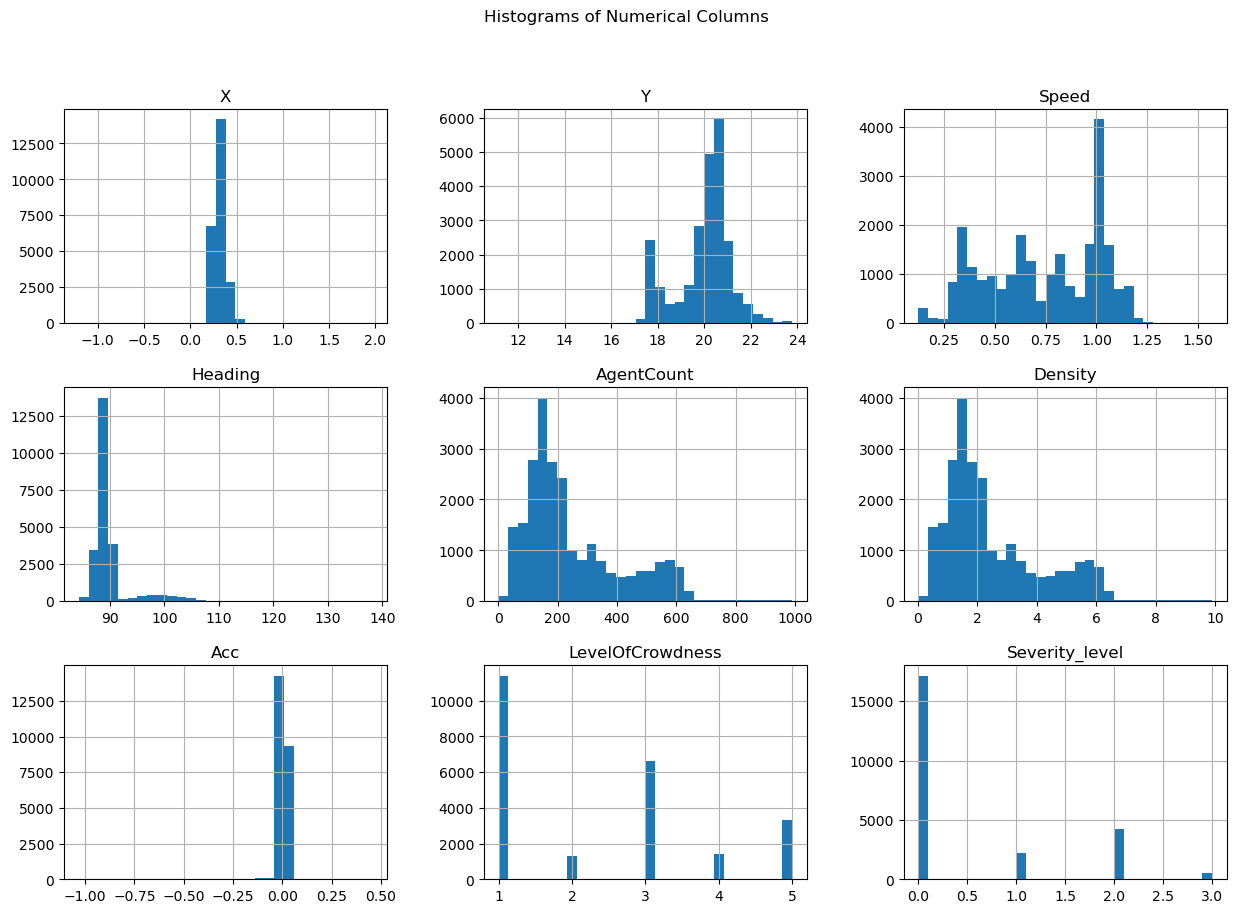

In [7]:
import seaborn as sns
# List of numerical columns
numerical_columns = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']

# Plot histograms for numerical columns
df[numerical_columns].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Columns')
plt.show()

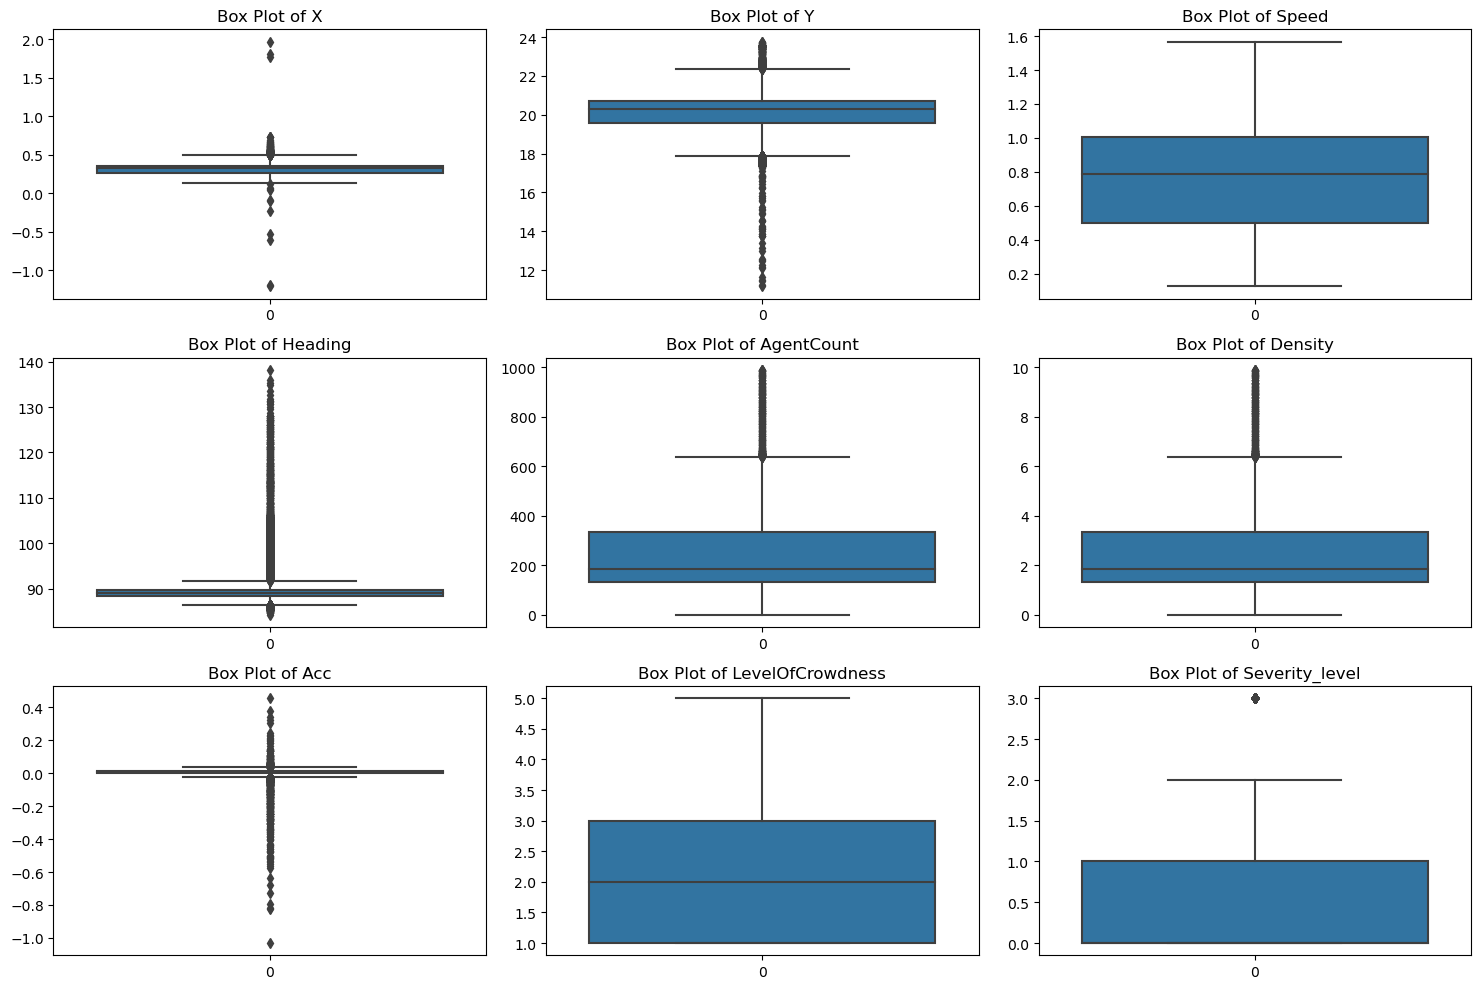

In [8]:
# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

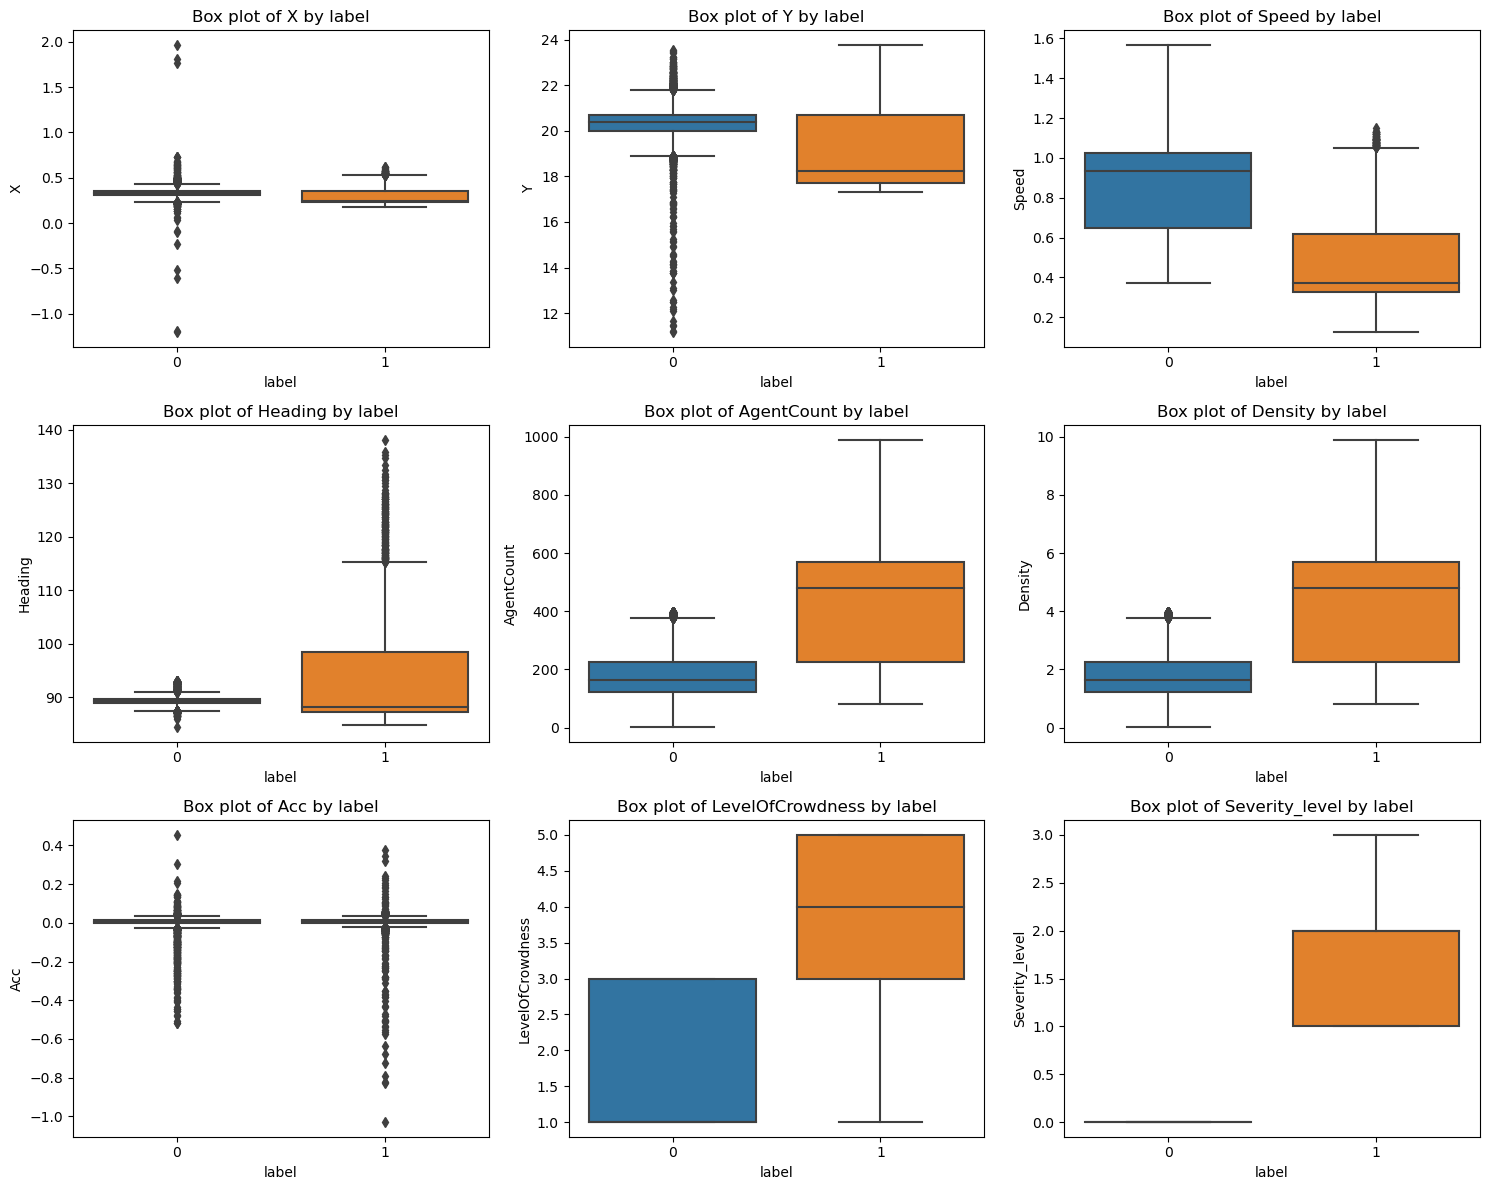

In [10]:
import seaborn as sns


# Select numerical columns for box plots
numerical_cols = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']

# Create box plots using matplotlib and seaborn
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f'Box plot of {col} by label')

plt.tight_layout()
plt.show()


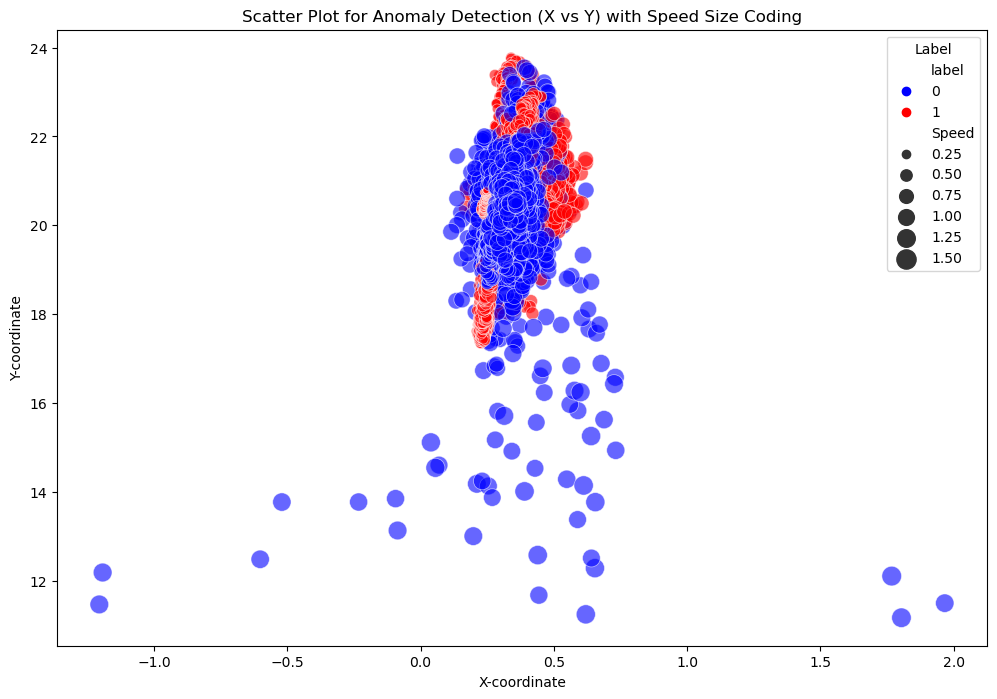

In [11]:
# Scatter plot for anomaly detection with Speed as color coding
plt.figure(figsize=(12, 8))
sns.scatterplot(x='X', y='Y', hue='label', size='Speed', sizes=(20, 200), data=df, palette=['blue', 'red'], alpha=0.6)
plt.title('Scatter Plot for Anomaly Detection (X vs Y) with Speed Size Coding')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend(title='Label', loc='upper right')
plt.show()

In [12]:
# Example: Creating a 'Category' column based on some conditions
df['Category'] = np.where(df['AgentCount'] > 10, 'High', 'Low')

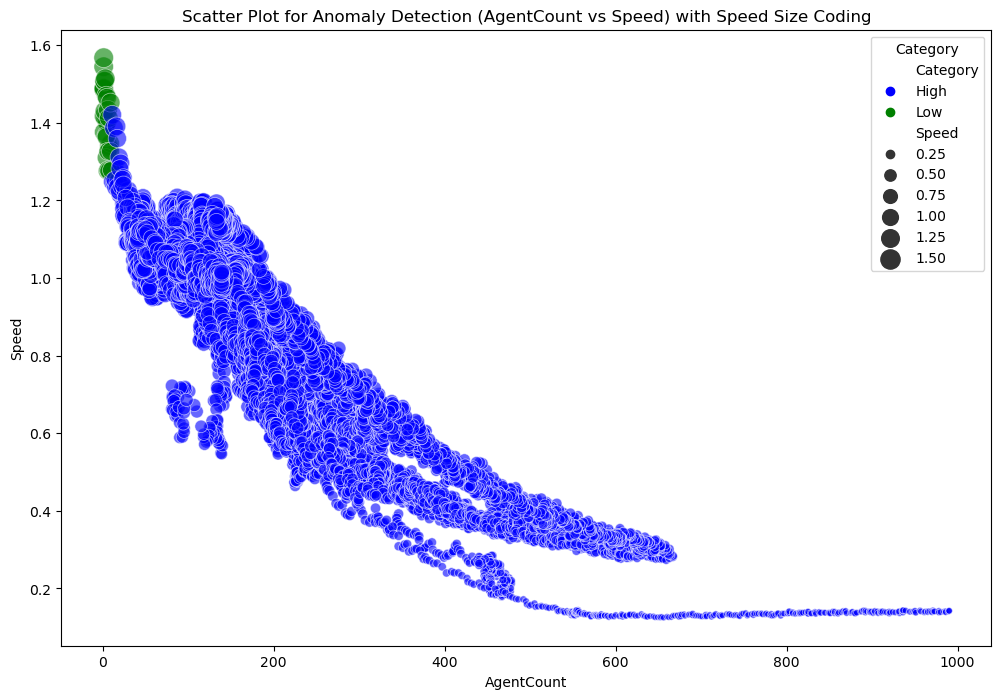

In [13]:
# Verify that the 'Category' column exists in the DataFrame
if 'Category' not in df.columns:
    print("The column 'Category' does not exist in the DataFrame.")
else:
    # Scatter plot for anomaly detection with AgentCount and Speed
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='AgentCount', y='Speed', hue='Category', size='Speed', sizes=(20, 200), data=df, palette=['blue', 'green'], alpha=0.6)
    plt.title('Scatter Plot for Anomaly Detection (AgentCount vs Speed) with Speed Size Coding')
    plt.xlabel('AgentCount')
    plt.ylabel('Speed')
    plt.legend(title='Category', loc='upper right')
    plt.show()


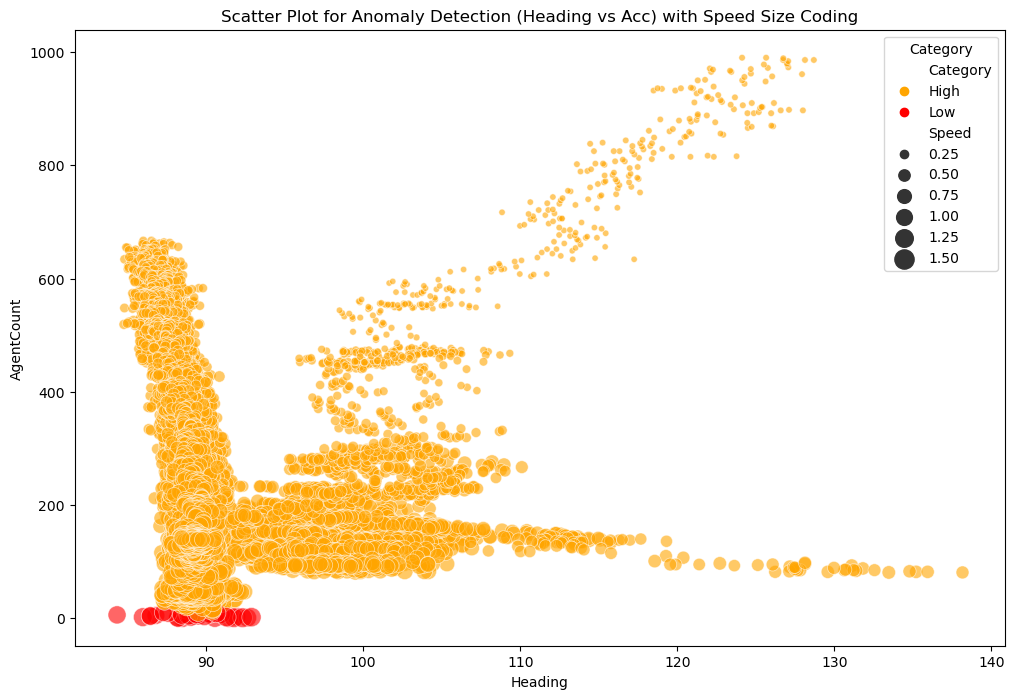

In [14]:
# Scatter plot for anomaly detection with Heading and Acc
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Heading', y='AgentCount', hue='Category', size='Speed', sizes=(20, 200), data=df, palette=['orange', 'red'], alpha=0.6)
plt.title('Scatter Plot for Anomaly Detection (Heading vs Acc) with Speed Size Coding')
plt.xlabel('Heading')
plt.ylabel('AgentCount')
plt.legend(title='Category', loc='upper right')
plt.show()

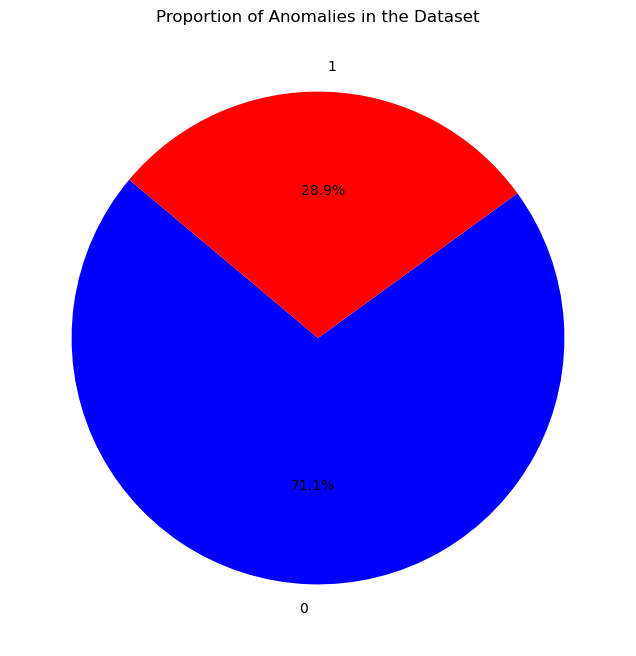

In [15]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.title('Proportion of Anomalies in the Dataset')
plt.show()

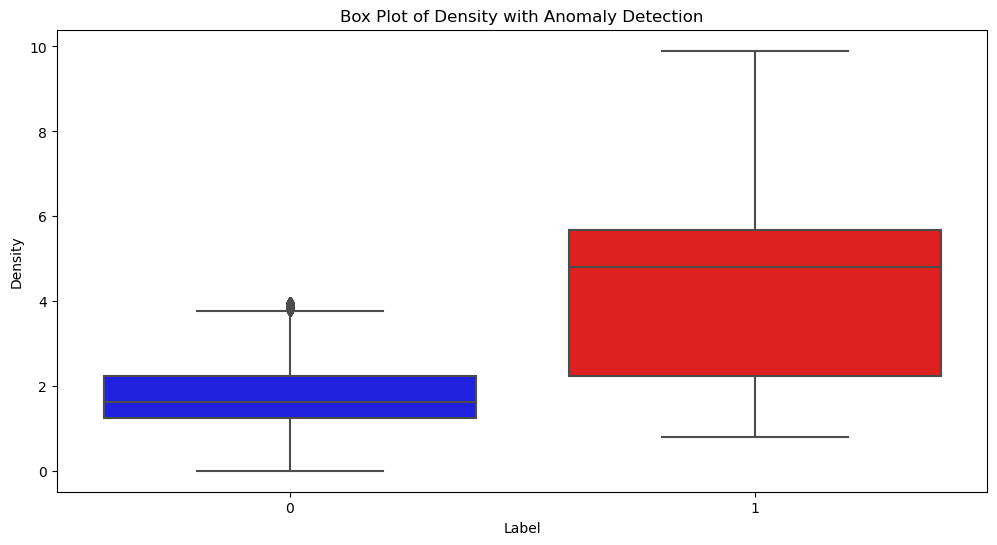

In [16]:
# Convert the label column to categorical if necessary
df['label'] = df['label'].astype('category')

# Create a box plot for the Density column
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='Density', data=df, palette=['blue', 'red'])
plt.title('Box Plot of Density with Anomaly Detection')
plt.xlabel('Label')
plt.ylabel('Density')
plt.show()

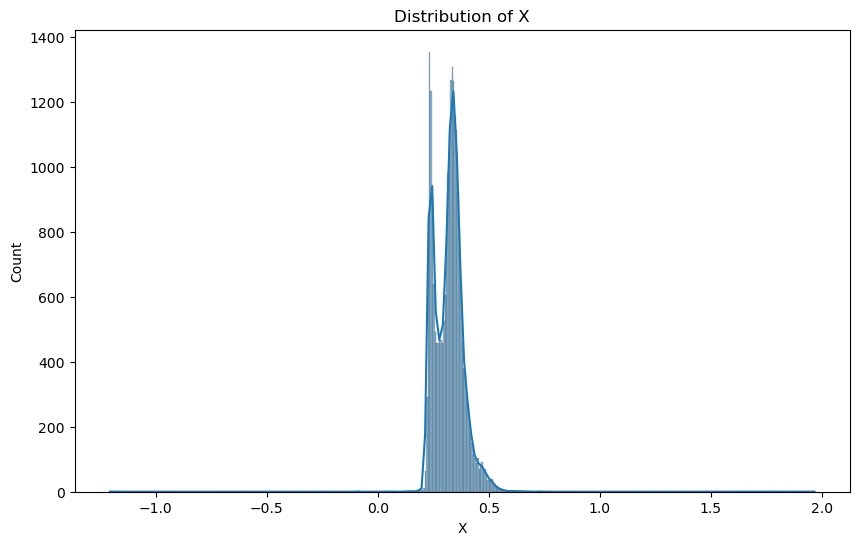

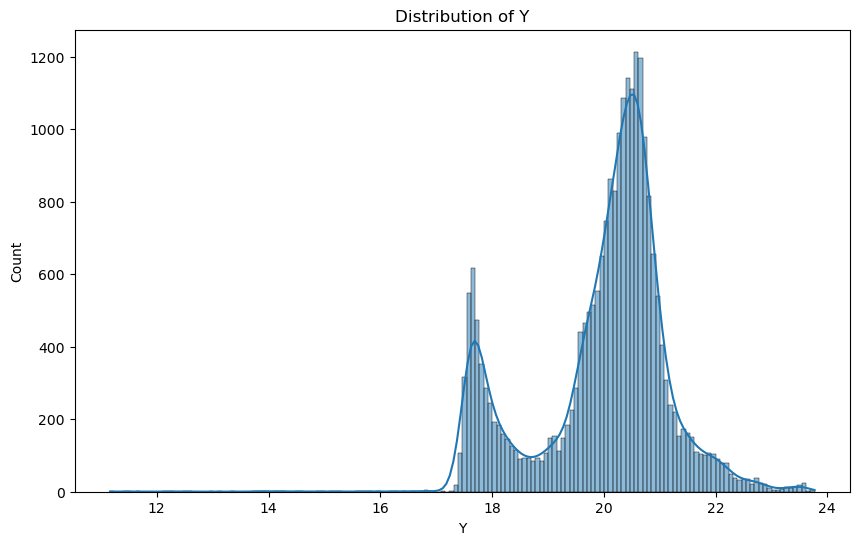

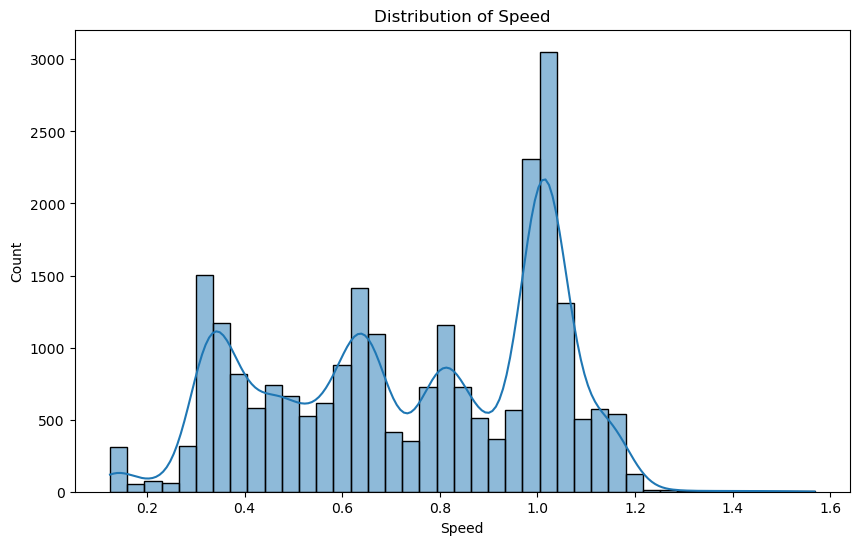

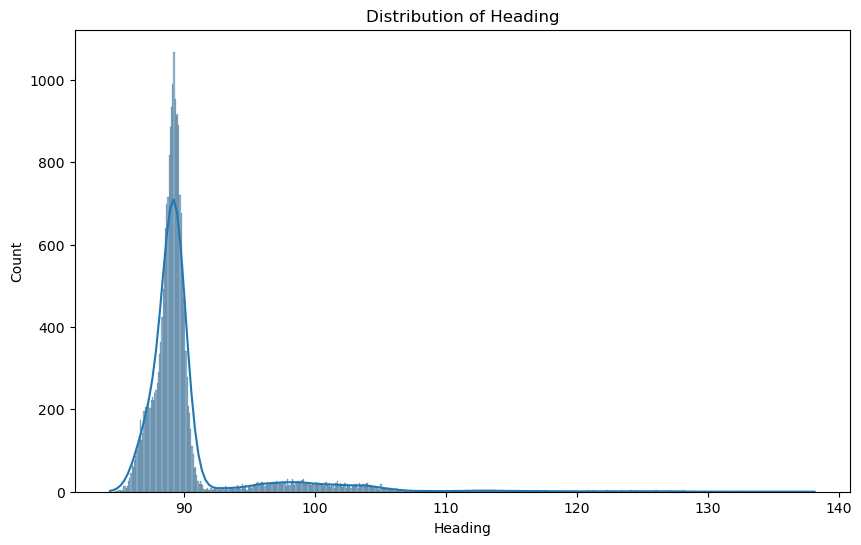

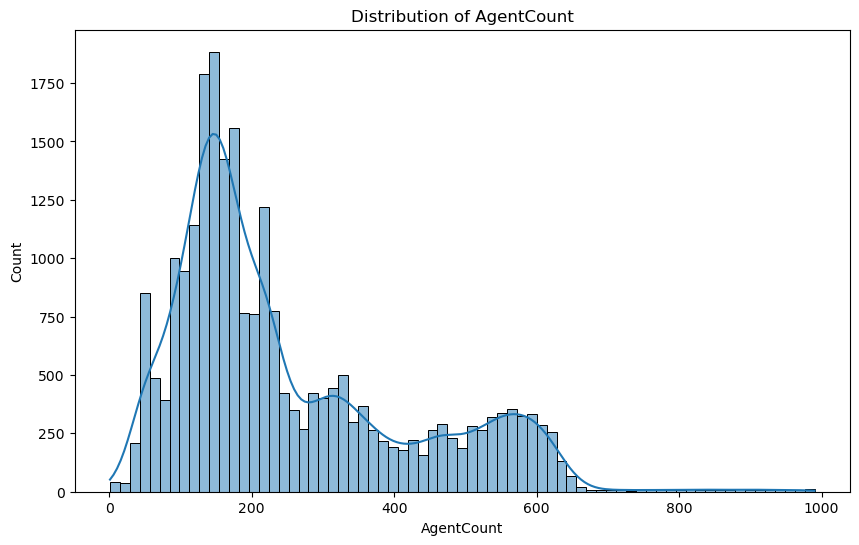

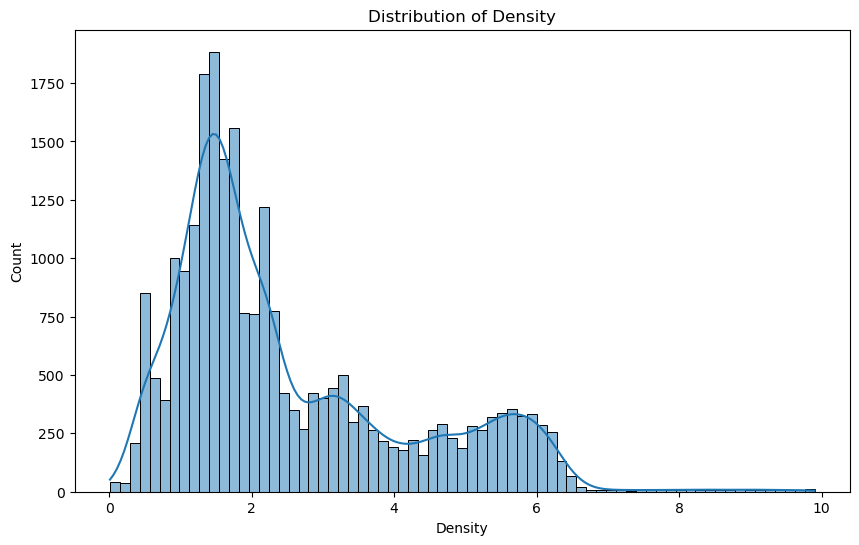

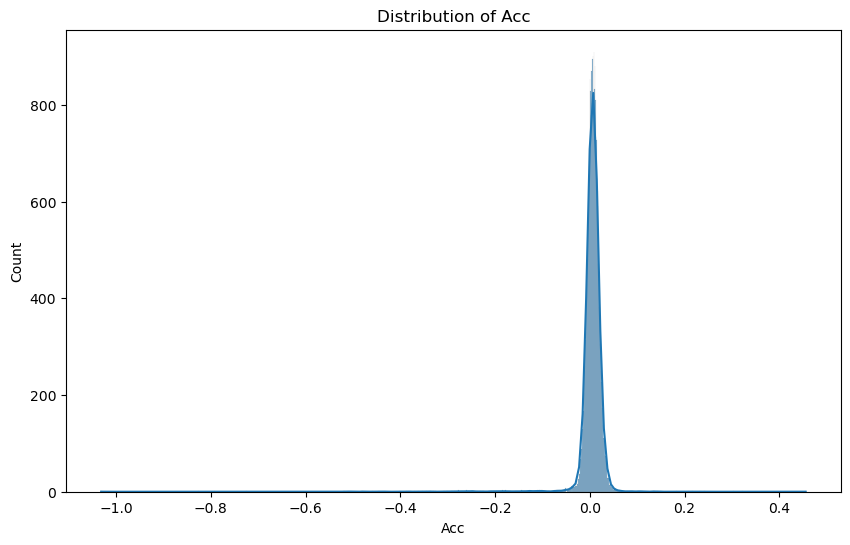

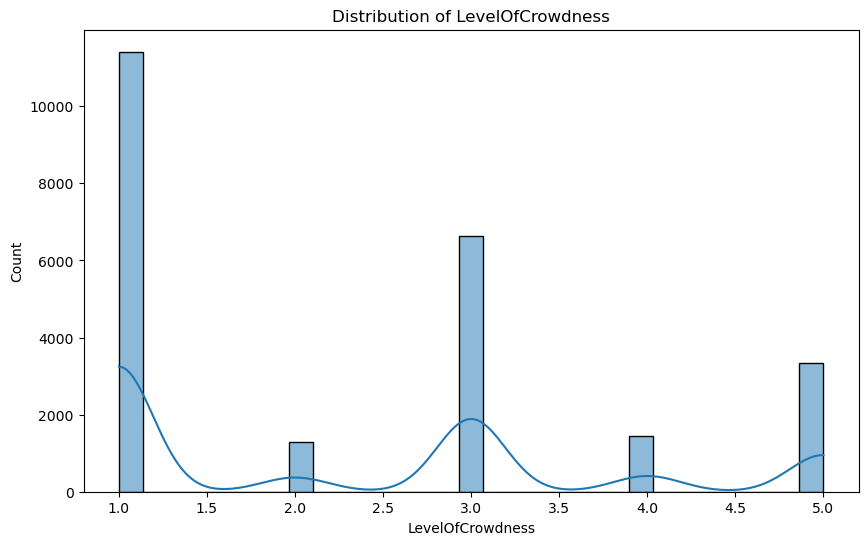

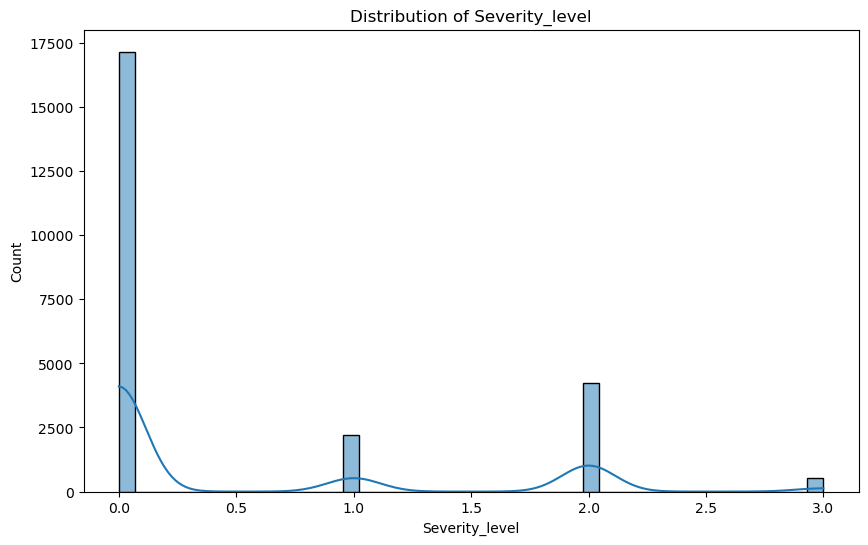

In [17]:
# Plot distribution for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

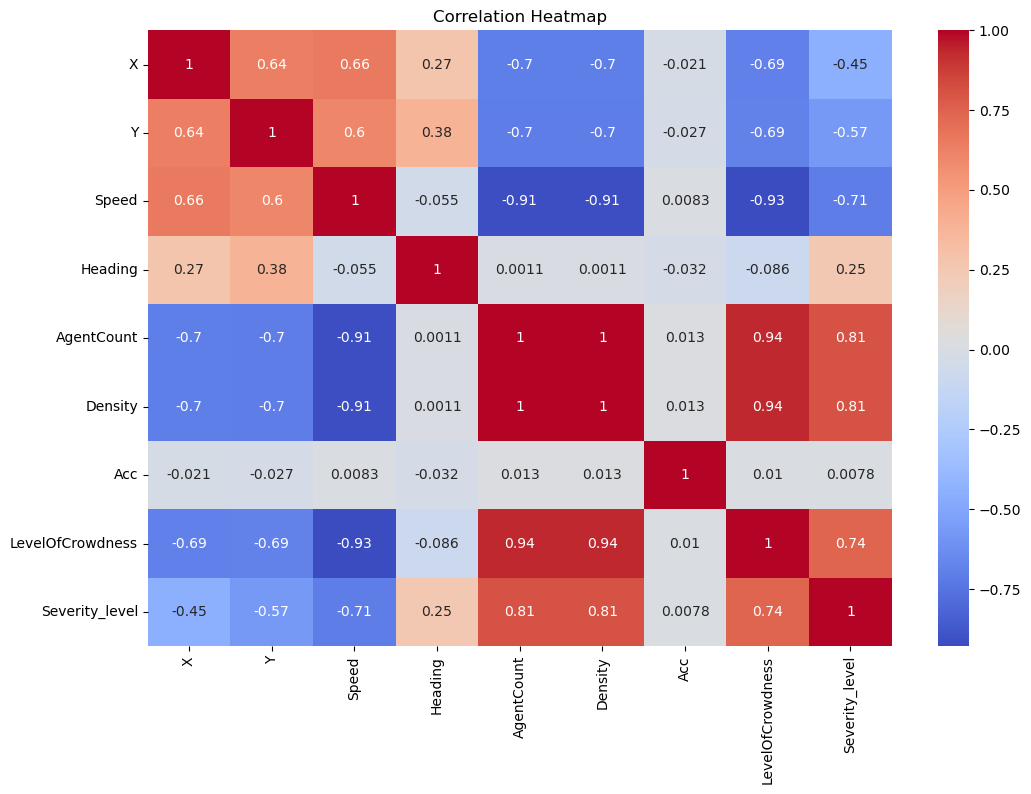

In [18]:
#  heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


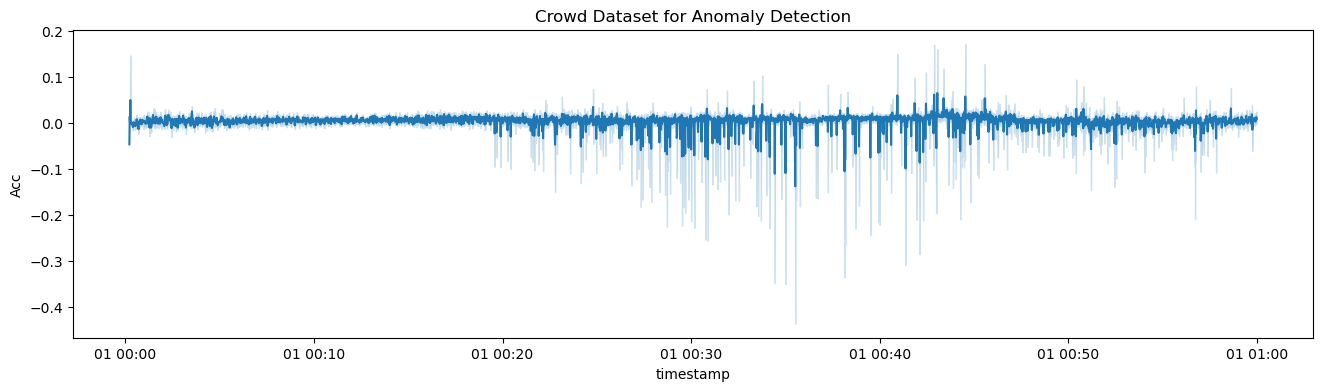

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
my_figsize = (16, 4)
plt.figure(figsize=my_figsize)

# Assuming `df` is your DataFrame with the relevant columns 'timestamp' and 'label'
sns.lineplot(x="timestamp", y="Acc", data=df)

# Setting the title for the plot
plt.title('Crowd Dataset for Anomaly Detection')

# Display the plot
plt.show()


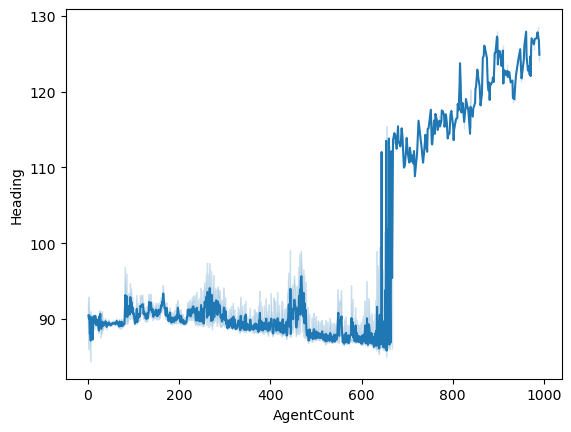

In [33]:
# Assuming `df` is your DataFrame with the relevant columns 'timestamp' and 'label'
sns.lineplot(x="AgentCount", y="Heading", data=df)

# Display the plot
plt.show()


# Data Preprocessing

In [19]:
# Check for missing values
df.isnull().sum()

timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
Category              0
dtype: int64

In [20]:
df['Acc'].fillna(df['Acc'].mean(), inplace=True)

In [21]:
df.isnull().sum()

timestamp           0
X                   0
Y                   0
Speed               0
Heading             0
AgentCount          0
Density             0
Acc                 0
LevelOfCrowdness    0
label               0
label2              0
Severity_level      0
Category            0
dtype: int64

In [22]:
#check for duplicate values
df.duplicated().sum()

0

In [23]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Ensure all data is numeric and handle non-numeric columns if any
# Convert data to numeric and handle non-numeric columns by dropping or encoding
data_numeric = df.select_dtypes(include=[float, int])  # Select only numeric columns

# Standardize the data
standardized_data = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Display the first few rows of the standardized dataset
print(standardized_data.head())


          X         Y     Speed   Heading  AgentCount   Density       Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795 -0.212691   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863 -0.212691   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965 -0.286634   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032 -0.157233   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032 -0.166476   

   LevelOfCrowdness  Severity_level  
0         -0.918124       -0.594115  
1         -0.918124       -0.594115  
2         -0.918124       -0.594115  
3         -0.918124       -0.594115  
4         -0.918124       -0.594115  


In [24]:
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                         X         Y     Speed   Heading  AgentCount  \
X                 1.000000  0.635939  0.658514  0.274861   -0.696405   
Y                 0.635939  1.000000  0.602989  0.382209   -0.703409   
Speed             0.658514  0.602989  1.000000 -0.054522   -0.914923   
Heading           0.274861  0.382209 -0.054522  1.000000    0.001107   
AgentCount       -0.696405 -0.703409 -0.914923  0.001107    1.000000   
Density          -0.696405 -0.703409 -0.914923  0.001107    1.000000   
Acc              -0.020906 -0.026881  0.008276 -0.031561    0.012882   
LevelOfCrowdness -0.689679 -0.686265 -0.929420 -0.086456    0.935304   
Severity_level   -0.452958 -0.570184 -0.705815  0.253543    0.807239   

                   Density       Acc  LevelOfCrowdness  Severity_level  
X                -0.696405 -0.020906         -0.689679       -0.452958  
Y                -0.703409 -0.026881         -0.686265       -0.570184  
Speed            -0.914923  0.008276         -0.929420      

In [25]:
correlation_matrix = standardized_data.corr()

correlation_threshold = 0.8

high_corr_features = correlation_matrix.index[correlation_matrix.abs().sum() > correlation_threshold]

# Print highly correlated features
print("Highly correlated features:")
print(high_corr_features)

filtered_data = standardized_data[high_corr_features]

print(filtered_data.head())


Highly correlated features:
Index(['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc',
       'LevelOfCrowdness', 'Severity_level'],
      dtype='object')
          X         Y     Speed   Heading  AgentCount   Density       Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795 -0.212691   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863 -0.212691   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965 -0.286634   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032 -0.157233   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032 -0.166476   

   LevelOfCrowdness  Severity_level  
0         -0.918124       -0.594115  
1         -0.918124       -0.594115  
2         -0.918124       -0.594115  
3         -0.918124       -0.594115  
4         -0.918124       -0.594115  


In [26]:
# Convert categorical columns to numerical if necessary (label encoding, one-hot encoding)
df['LevelOfCrowdness'] = df['LevelOfCrowdness'].astype('category').cat.codes

# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
high_corr_threshold = 0.9
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print("Highly correlated features (correlation > 0.9):", high_corr_features)
data_reduced = df.drop(columns=high_corr_features)

# Select only numeric columns for variance analysis
numeric_cols = data_reduced.select_dtypes(include=[np.number]).columns

# Variance Analysis
low_variance_threshold = 0.01
low_variance_features = [column for column in numeric_cols if data_reduced[column].var() < low_variance_threshold]
print("Low variance features (variance < 0.01):", low_variance_features)
data_reduced = data_reduced.drop(columns=low_variance_features)

# Check the remaining features
print(data_reduced.columns)

Highly correlated features (correlation > 0.9): {'AgentCount', 'Density', 'LevelOfCrowdness'}
Low variance features (variance < 0.01): ['X', 'Acc']
Index(['timestamp', 'Y', 'Speed', 'Heading', 'label', 'label2',
       'Severity_level', 'Category'],
      dtype='object')


# Feature Engineering

In [27]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S')

# Extract hour, minute, and second from timestamp
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

In [28]:
df

,timestamp,X,Y,Speed,Heading,AgentCount,Density,Acc,LevelOfCrowdness,label,label2,Severity_level,Category,hour,minute,second
0,1900-01-01 00:05:36,0.4225,19.1176,1.1432,89.1222,81,0.81,-0.0027,0,0,normal,0,High,0,5,36
1,1900-01-01 00:05:37,0.3704,19.5130,1.1476,89.5976,83,0.83,-0.0027,0,0,normal,0,High,0,5,37
2,1900-01-01 00:05:38,0.3999,19.8316,1.1466,89.4905,86,0.86,-0.0051,0,0,normal,0,High,0,5,38
3,1900-01-01 00:05:39,0.3787,20.0386,1.1521,89.2123,88,0.88,-0.0009,0,0,normal,0,High,0,5,39
4,1900-01-01 00:05:40,0.4031,20.4625,1.1499,89.2521,88,0.88,-0.0012,0,0,normal,0,High,0,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,1900-01-01 00:14:55,0.3559,20.4337,0.9835,89.1479,139,1.39,-0.0029,0,0,normal,0,High,0,14,55
24119,1900-01-01 00:14:56,0.3657,20.4616,1.0152,88.4519,142,1.42,0.0306,0,0,normal,0,High,0,14,56
24120,1900-01-01 00:14:57,0.3695,20.4869,1.0084,89.4419,139,1.39,-0.0019,0,0,normal,0,High,0,14,57
24121,1900-01-01 00:14:58,0.3580,20.4423,1.0107,90.5225,139,1.39,0.0130,0,0,normal,0,High,0,14,58


In [29]:
# Create interaction features
df['Speed_Density'] = df['Speed'] * df['Density']
df['Speed_Acc'] = df['Speed'] * df['Acc']
df['Density_Acc'] = df['Density'] * df['Acc']

In [30]:
# Calculate average density per level of crowdness
df['avg_density_per_crowd_level'] = df.groupby('LevelOfCrowdness')['Density'].transform('mean')

# Calculate average speed per agent count
df['avg_speed_per_agent_count'] = df.groupby('AgentCount')['Speed'].transform('mean')

# Skewness check

In [34]:
# List of columns to analyze for skewness
columns_to_analyze = ['Speed', 'AgentCount', 'Density', 'Acc']

In [35]:
# Calculate skewness
skewness = df[columns_to_analyze].skew()

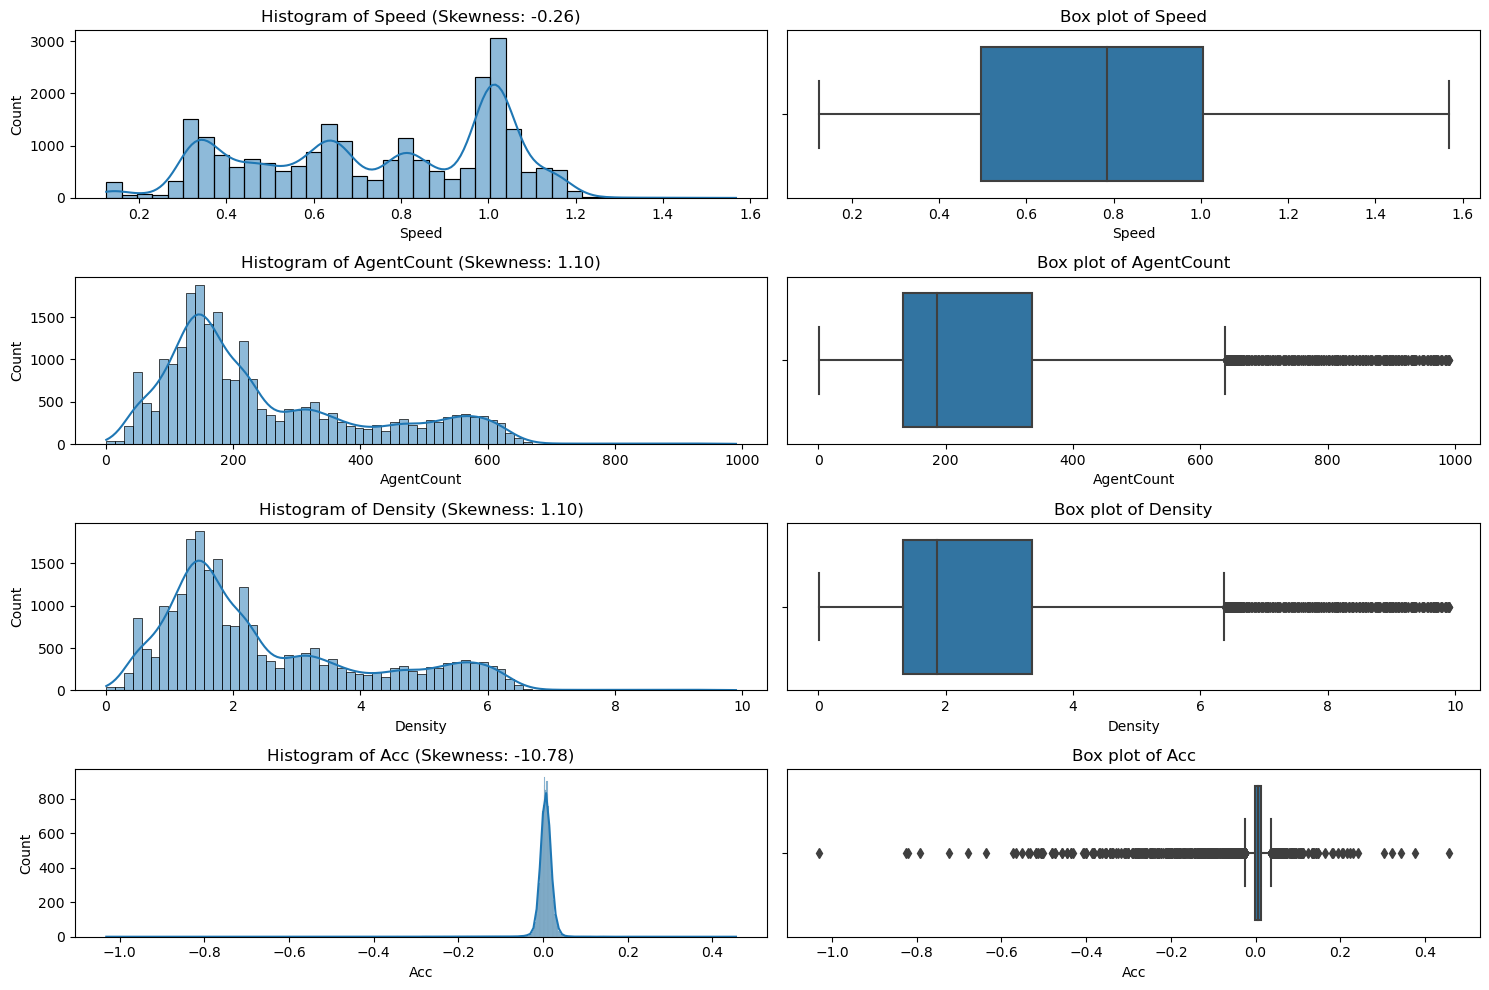

In [36]:
# Plot histograms and box plots
fig, axes = plt.subplots(len(columns_to_analyze), 2, figsize=(15, 10))

for i, column in enumerate(columns_to_analyze):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column} (Skewness: {skewness[column]:.2f})')
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

In [37]:
# Print skewness values
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
Speed         -0.261571
AgentCount     1.103162
Density        1.103162
Acc          -10.775862
dtype: float64


# IQR Analysis

Total outliers detected in X using IQR: 280
Total outliers detected in Y using IQR: 3004
Total outliers detected in Speed using IQR: 0
Total outliers detected in Heading using IQR: 3461
Total outliers detected in AgentCount using IQR: 284
Total outliers detected in Density using IQR: 284
Total outliers detected in Acc using IQR: 857
Total outliers detected in LevelOfCrowdness using IQR: 0
Total outliers detected in Severity_level using IQR: 534


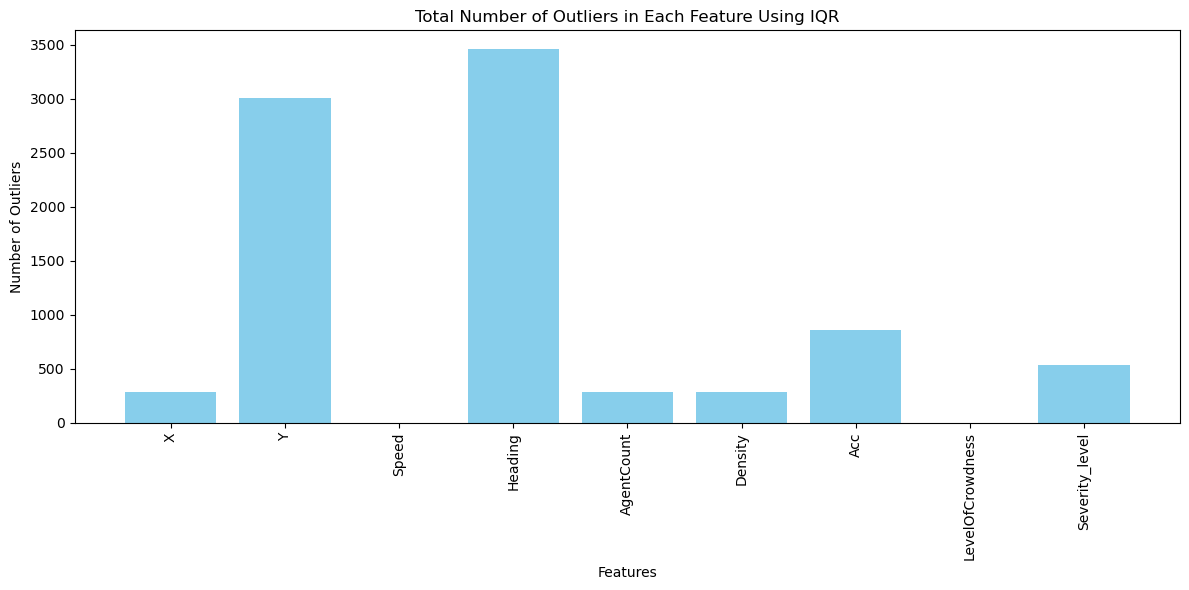

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'standardized_data' is already defined and contains the standardized data

# Interquartile Range (IQR) for outlier detection
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detecting outliers for each feature using IQR and counting them
outlier_counts_iqr = {}
for column in standardized_data.columns:
    outliers = detect_outliers_iqr(standardized_data, column)
    outlier_counts_iqr[column] = len(outliers)
    print(f"Total outliers detected in {column} using IQR: {outlier_counts_iqr[column]}")

# Plotting the total number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts_iqr.keys(), outlier_counts_iqr.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Total Number of Outliers in Each Feature Using IQR')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Z-Score

Total outliers detected in X using Z-Score: 128
Total outliers detected in Y using Z-Score: 50
Total outliers detected in Speed using Z-Score: 0
Total outliers detected in Heading using Z-Score: 510
Total outliers detected in AgentCount using Z-Score: 140
Total outliers detected in Density using Z-Score: 140
Total outliers detected in Acc using Z-Score: 254
Total outliers detected in LevelOfCrowdness using Z-Score: 0
Total outliers detected in Severity_level using Z-Score: 0
Total outliers detected in hour using Z-Score: 0
Total outliers detected in minute using Z-Score: 0
Total outliers detected in second using Z-Score: 0
Total outliers detected in Speed_Density using Z-Score: 57
Total outliers detected in Speed_Acc using Z-Score: 290
Total outliers detected in Density_Acc using Z-Score: 153
Total outliers detected in avg_density_per_crowd_level using Z-Score: 0
Total outliers detected in avg_speed_per_agent_count using Z-Score: 0


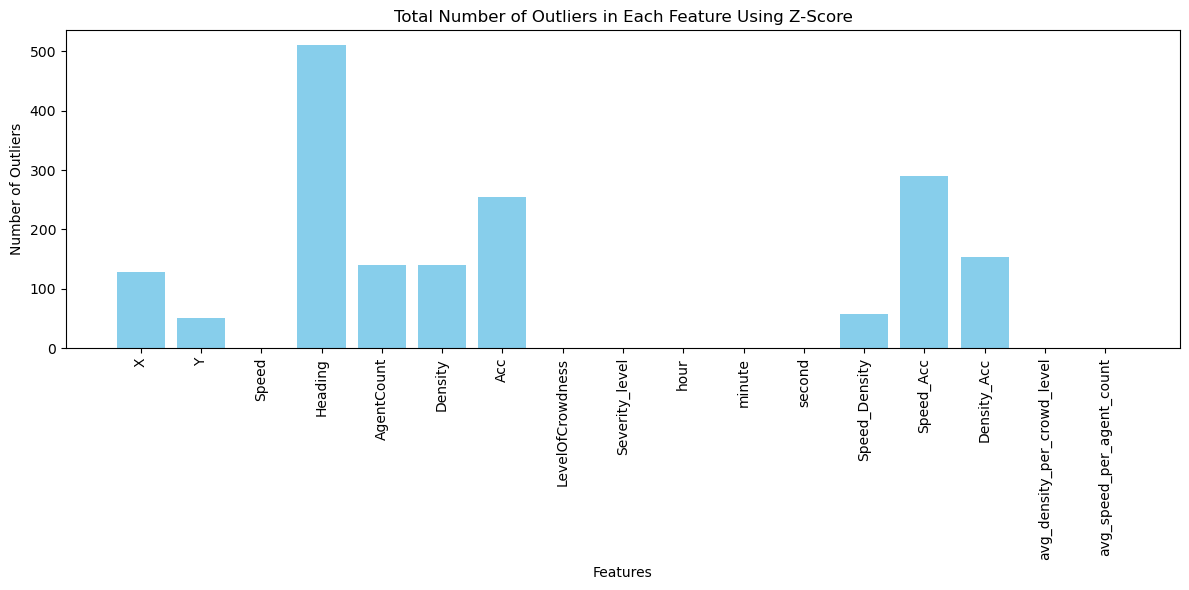

In [39]:

from scipy.stats import zscore

# Select only numeric columns for standardization
numeric_columns = df.select_dtypes(include=[np.number]).columns
standardized_data = df[numeric_columns].apply(zscore)

# Z-Score for outlier detection
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = df[column]
    return df[(z_scores > threshold) | (z_scores < -threshold)]

# Detecting outliers for each feature using Z-Score and counting them
outlier_counts = {}
for column in standardized_data.columns:
    outliers = detect_outliers_zscore(standardized_data, column)
    outlier_counts[column] = len(outliers)
    print(f"Total outliers detected in {column} using Z-Score: {outlier_counts[column]}")

# Plotting the total number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Total Number of Outliers in Each Feature Using Z-Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Model Building using Isolation Forest

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = pd.read_csv('Crowd data for anomaly detection.csv')

# Separate features and target
X = data.drop(columns=['label', 'label2'])  # Adjust as necessary
y = data['label']  # Assuming 'label' indicates normal or anomaly

# Extract numeric columns
X_numeric = data.select_dtypes(include=[np.number])

# Handle missing values
X_numeric = X_numeric.dropna()

# Ensure target variable also excludes these rows
y = y[X_numeric.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)  # Adjust test_size

Accuracy: 0.9104912572855953
Precision: 0.8286852589641435
Recall: 0.8788732394366198
F1-Score: 0.8530416951469583


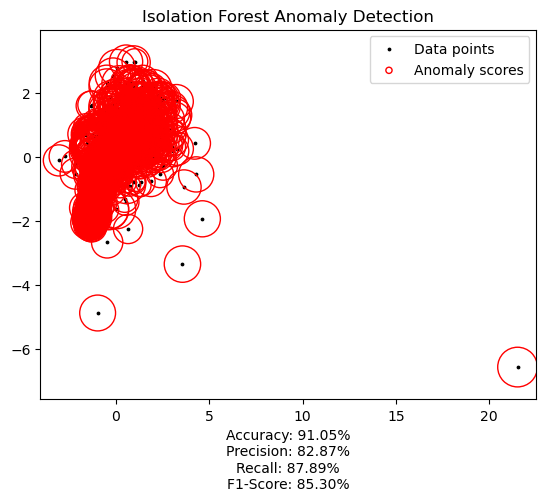

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1692
           1       0.83      0.88      0.85       710

    accuracy                           0.91      2402
   macro avg       0.89      0.90      0.89      2402
weighted avg       0.91      0.91      0.91      2402

[[1563  129]
 [  86  624]]


In [41]:
from matplotlib.legend_handler import HandlerPathCollection

# Assuming X_train, X_test, and y_test are already defined and preprocessed

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.3, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Convert predictions from {1, -1} to {0, 1}
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

# Evaluate the model
iso_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Print evaluation metrics
print("Accuracy:", iso_accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Compute the anomaly scores
anomaly_scores = iso_forest.decision_function(X_test)

# Plot the results
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(X_test[:, 0], X_test[:, 1], color="k", s=3.0, label="Data points")

# Plot circles with radius proportional to the anomaly scores
radius = (anomaly_scores.max() - anomaly_scores) / (anomaly_scores.max() - anomaly_scores.min())
scatter = plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Anomaly scores",
)
plt.axis("tight")
plt.xlim((X_test[:, 0].min() - 1, X_test[:, 0].max() + 1))
plt.ylim((X_test[:, 1].min() - 1, X_test[:, 1].max() + 1))
plt.xlabel(f"Accuracy: {iso_accuracy:.2%}\nPrecision: {precision:.2%}\nRecall: {recall:.2%}\nF1-Score: {f1:.2%}")
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Isolation Forest Anomaly Detection")
plt.show()

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

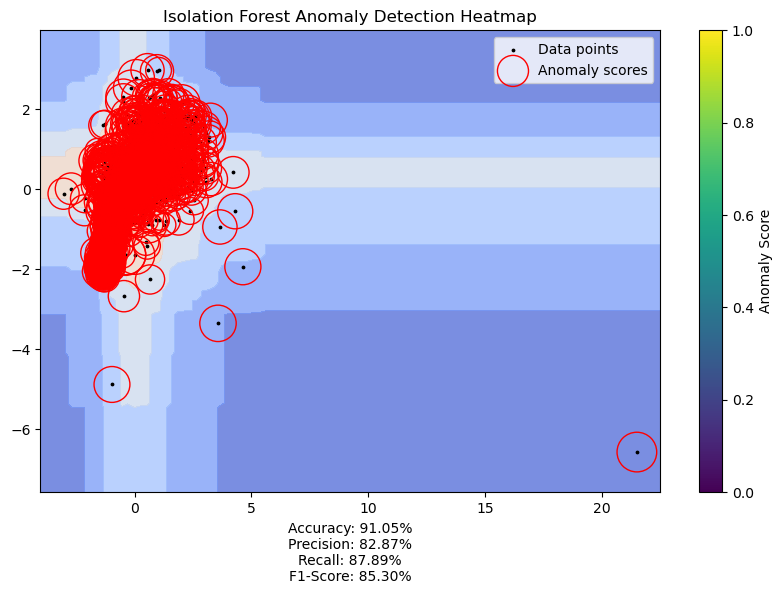

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1692
           1       0.83      0.88      0.85       710

    accuracy                           0.91      2402
   macro avg       0.89      0.90      0.89      2402
weighted avg       0.91      0.91      0.91      2402

[[1563  129]
 [  86  624]]


In [43]:
from matplotlib.colors import ListedColormap


# Compute the anomaly scores
anomaly_scores = iso_forest.decision_function(X_test)

# Select two features for visualization
X_vis = X_test[:, :2]

# Plot the results using a heatmap
plt.figure(figsize=(10, 6))

# Create a grid for the heatmap
xx, yy = np.meshgrid(np.linspace(X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1, 100),
                     np.linspace(X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1, 100))

# Compute the anomaly scores for each point in the grid
grid_scores = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.ravel().shape[0], X_test.shape[1] - 2))])
grid_scores = grid_scores.reshape(xx.shape)

# Create the heatmap
plt.contourf(xx, yy, grid_scores, cmap='coolwarm', alpha=0.75)

# Plot the data points
plt.scatter(X_vis[:, 0], X_vis[:, 1], color="k", s=3.0, label="Data points")

# Overlay the data points with their anomaly scores
radius = (anomaly_scores.max() - anomaly_scores) / (anomaly_scores.max() - anomaly_scores.min())
scatter = plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Anomaly scores",
)
plt.colorbar(label='Anomaly Score')
plt.axis("tight")
plt.xlim((X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1))
plt.ylim((X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1))
plt.xlabel(f"Accuracy: {iso_accuracy:.2%}\nPrecision: {precision:.2%}\nRecall: {recall:.2%}\nF1-Score: {f1:.2%}")
plt.legend()
plt.title("Isolation Forest Anomaly Detection Heatmap")
plt.show()

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


Simulated Precision: 0.78
Simulated Recall: 0.81
Simulated F1-score: 0.80
Accuracy: 0.88


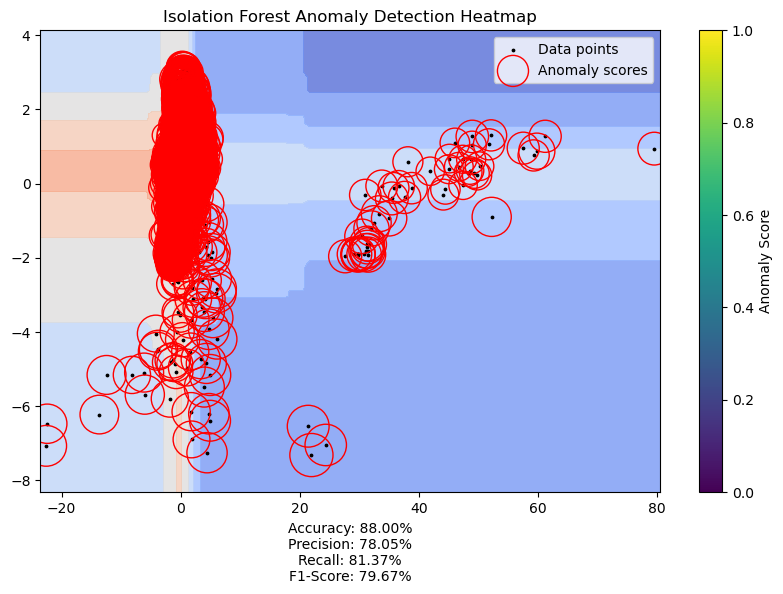

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     17152
           1       0.78      0.81      0.80      6971

    accuracy                           0.88     24123
   macro avg       0.85      0.86      0.86     24123
weighted avg       0.88      0.88      0.88     24123

[[15557  1595]
 [ 1299  5672]]
Cross-validation accuracies for each fold: [0.87336788 0.87937824 0.88704663 0.88577944 0.92682421]
Mean cross-validation accuracy: 0.8904792789077067


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Prepare the data (exclude non-numeric and target columns)
features = data[['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc']].values

# Define ground truth for anomaly detection
ground_truth = data['label'].values

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Create a copy of the data to simulate anomalies
simulated_data = data.copy()

# Introduce anomalies by randomly altering some values
np.random.seed(42)
anomaly_indices = np.random.choice(len(simulated_data), size=50, replace=False)
simulated_data.loc[anomaly_indices, 'X'] *= 10  # Arbitrary large change to simulate anomaly

# Prepare simulated features
simulated_features = simulated_data[['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc']]
simulated_features_imputed = imputer.transform(simulated_features)
simulated_features_scaled = scaler.transform(simulated_features_imputed)

# Train Isolation Forest model on original data
iso_forest = IsolationForest(contamination=0.3, random_state=42)
iso_forest.fit(features_scaled)

# Predict anomalies on simulated data
simulated_data['Simulated_IF_Score'] = iso_forest.predict(simulated_features_scaled)
simulated_data['Simulated_IF_Anomaly_Score'] = iso_forest.decision_function(simulated_features_scaled)
simulated_data['Simulated_Anomaly'] = simulated_data['Simulated_IF_Score'].apply(lambda x: 1 if x == -1 else 0)

# Evaluate the model on simulated data
simulated_precision = precision_score(data['label'], simulated_data['Simulated_Anomaly'])
simulated_recall = recall_score(data['label'], simulated_data['Simulated_Anomaly'])
simulated_f1 = f1_score(data['label'], simulated_data['Simulated_Anomaly'])

print(f'Simulated Precision: {simulated_precision:.2f}')
print(f'Simulated Recall: {simulated_recall:.2f}')
print(f'Simulated F1-score: {simulated_f1:.2f}')

# Calculate accuracy
accuracy = accuracy_score(data['label'], simulated_data['Simulated_Anomaly'])
print(f'Accuracy: {accuracy:.2f}')

# Visualization of Anomaly Scores
anomaly_scores = iso_forest.decision_function(simulated_features_scaled)

# Select two features for visualization
X_vis = simulated_features_scaled[:, :2]

# Plot the results using a heatmap
plt.figure(figsize=(10, 6))

# Create a grid for the heatmap
xx, yy = np.meshgrid(np.linspace(X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1, 100),
                     np.linspace(X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1, 100))

# Prepare the grid with the same number of features
grid = np.c_[xx.ravel(), yy.ravel()]
if simulated_features_scaled.shape[1] > 2:
    grid = np.hstack((grid, np.zeros((grid.shape[0], simulated_features_scaled.shape[1] - 2))))

# Compute the anomaly scores for each point in the grid
grid_scores = iso_forest.decision_function(grid)
grid_scores = grid_scores.reshape(xx.shape)

# Create the heatmap
plt.contourf(xx, yy, grid_scores, cmap='coolwarm', alpha=0.75)

# Plot the data points
plt.scatter(X_vis[:, 0], X_vis[:, 1], color="k", s=3.0, label="Data points")

# Overlay the data points with their anomaly scores
radius = (anomaly_scores.max() - anomaly_scores) / (anomaly_scores.max() - anomaly_scores.min())
scatter = plt.scatter(
    X_vis[:, 0],
    X_vis[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Anomaly scores",
)
plt.colorbar(label='Anomaly Score')
plt.axis("tight")
plt.xlim((X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1))
plt.ylim((X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1))
plt.xlabel(f"Accuracy: {accuracy:.2%}\nPrecision: {simulated_precision:.2%}\nRecall: {simulated_recall:.2%}\nF1-Score: {simulated_f1:.2%}")
plt.legend()
plt.title("Isolation Forest Anomaly Detection Heatmap")
plt.show()

# Print classification report and confusion matrix
print(classification_report(data['label'], simulated_data['Simulated_Anomaly']))
print(confusion_matrix(data['label'], simulated_data['Simulated_Anomaly']))

# Cross-validation
def isolation_forest_accuracy(y_true, y_pred):
    y_pred = np.where(y_pred == 1, 0, 1)  # Convert Isolation Forest predictions to match ground truth format
    return accuracy_score(y_true, y_pred)

scorer = make_scorer(isolation_forest_accuracy, greater_is_better=True)
scores = cross_val_score(iso_forest, features_scaled, ground_truth, cv=5, scoring=scorer)

# Print cross-validation results
print("Cross-validation accuracies for each fold:", scores)
print("Mean cross-validation accuracy:", scores.mean())


Correctly flagged simulated anomalies: 7 out of 10


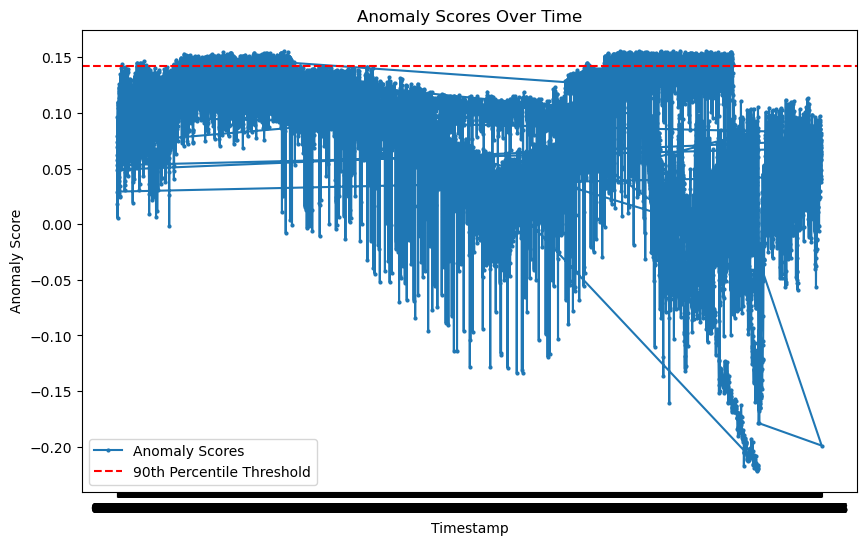

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Assuming 'features' is your original dataset of features
# If not, replace 'features' with your actual dataset variable name

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Number of anomalies to simulate
n_simulate = 10

# Create a copy of the data to simulate anomalies
simulated_anomalies = features_scaled.copy()

# Randomly introduce anomalies
np.random.seed(42)
anomaly_indices = np.random.choice(len(simulated_anomalies), n_simulate, replace=False)
simulated_anomalies[anomaly_indices] += np.random.normal(0, 1, simulated_anomalies[anomaly_indices].shape)

# Fit Isolation Forest on simulated data and predict anomalies
iso_forest = IsolationForest(contamination=0.1)
iso_forest.fit(simulated_anomalies)
y_simulated_pred = iso_forest.predict(simulated_anomalies)
y_simulated_pred = np.where(y_simulated_pred == 1, 0, 1)

# Check how many simulated anomalies were correctly flagged
correct_flags = (y_simulated_pred[anomaly_indices] == 1).sum()
print(f"Correctly flagged simulated anomalies: {correct_flags} out of {n_simulate}")

# Compute the negative outlier factor for visualization
X_scores = iso_forest.decision_function(simulated_anomalies)
timestamps = data['timestamp'].values

# Plot anomaly scores against time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, X_scores, marker='o', linestyle='-', markersize=2, label='Anomaly Scores')
plt.axhline(y=np.percentile(X_scores, 90), color='r', linestyle='--', label='90th Percentile Threshold')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Over Time')
plt.legend()
plt.show()


Correctly flagged simulated anomalies: 7 out of 10


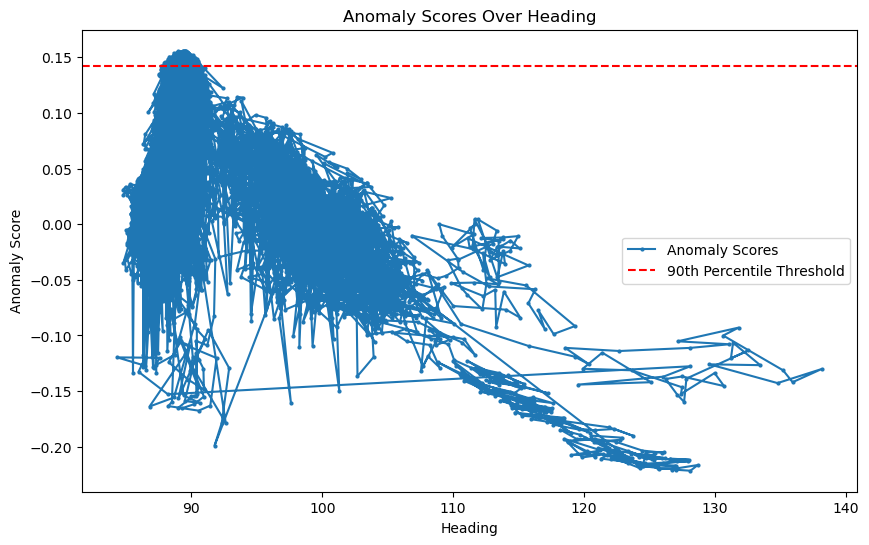

In [53]:
# Check how many simulated anomalies were correctly flagged
correct_flags = (y_simulated_pred[anomaly_indices] == 1).sum()
print(f"Correctly flagged simulated anomalies: {correct_flags} out of {n_simulate}")

# Compute the negative outlier factor for visualization
X_scores = iso_forest.decision_function(simulated_anomalies)
timestamps = data['Heading'].values

# Plot anomaly scores against time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, X_scores, marker='o', linestyle='-', markersize=2, label='Anomaly Scores')
plt.axhline(y=np.percentile(X_scores, 90), color='r', linestyle='--', label='90th Percentile Threshold')
plt.xlabel('Heading')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Over Heading')
plt.legend()
plt.show()


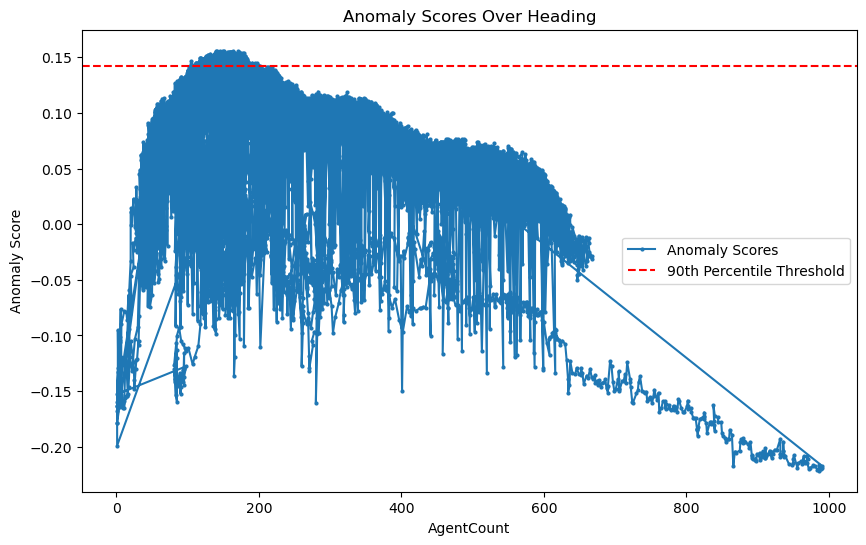

In [52]:
# Compute the negative outlier factor for visualization
X_scores = iso_forest.decision_function(simulated_anomalies)
timestamps = data['AgentCount'].values

# Plot anomaly scores against time
plt.figure(figsize=(10, 6))
plt.plot(timestamps, X_scores, marker='o', linestyle='-', markersize=2, label='Anomaly Scores')
plt.axhline(y=np.percentile(X_scores, 90), color='r', linestyle='--', label='90th Percentile Threshold')
plt.xlabel('AgentCount')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Over AgentCount')
plt.legend()
plt.show()
